In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from principal_DNN_MNIST import DNN
from read_save import lire_mnist

In [3]:
X_train, X_test, y_train, y_test = lire_mnist()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [5]:
layer_sizes = [784, 200, 200, 10]
mini_batch_size = 500
lr = 0.1
nb_epochs = 100

In [6]:
DNN_model = DNN(layer_sizes)
DNN_model.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)

Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.05359731355367136
Epoch 26/100, erreur de reconstruction: 0.019179613305076032
Epoch 51/100, erreur de reconstruction: 0.01570740437546539
Epoch 76/100, erreur de reconstruction: 0.014243942759897694
Epoch 100/100, erreur de reconstruction: 0.013446012489868715
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.11569732653185555
Epoch 26/100, erreur de reconstruction: 0.024524206595628737
Epoch 51/100, erreur de reconstruction: 0.018840314034550196
Epoch 76/100, erreur de reconstruction: 0.016625008581626452
Epoch 100/100, erreur de reconstruction: 0.015503744116570364
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.11854257461804388
Epoch 26/100, erreur de reconstruction: 0.07764614316515026
Epoch 51/100, erreur de reconstruction: 0.07574217740294391
Epoch 76/100, erreur de reconstruction: 0.0746346208930396
Epoch 100/100, erreur de reconstruction: 0.07403848599173

In [7]:
DNN_model.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)

Entraînement DNN
Epoch 1/100, loss: 9.956867003789387
Epoch 26/100, loss: 0.3170239157537816
Epoch 51/100, loss: 0.22318569066863544
Epoch 76/100, loss: 0.18013974233155117
Epoch 100/100, loss: 0.15339335463286058


In [8]:
accuracy = DNN_model.test_DNN(X_test, y_test)

Error rate: 0.0492


### Analyse des hyperparamètres
#### DBN entraîné ou non ?

Nous avons fais le choix de prendre le même nombre d'itérations pour les descentes de gradient (100 pour les RBM et 100 pour l'algorithme de rétro-propagation du gradient)

In [9]:
print("-- Pretraining model --")
DNN_pretraining = DNN(layer_sizes)
DNN_pretraining.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)
DNN_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)

print("-- No pretraining model --")
DNN_NO_pretraining = DNN(layer_sizes)
DNN_NO_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)

error_rate_pretraining_train = DNN_pretraining.test_DNN(X_train, y_train)
error_rate_pretraining_test = DNN_pretraining.test_DNN(X_test, y_test)

error_rate_no_pretraining_train = DNN_NO_pretraining.test_DNN(X_train, y_train)
error_rate_no_pretraining_test = DNN_NO_pretraining.test_DNN(X_test, y_test)

-- Pretraining model --
Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.053453850679281746
Epoch 26/100, erreur de reconstruction: 0.01919599133801841
Epoch 51/100, erreur de reconstruction: 0.015696885780684133
Epoch 76/100, erreur de reconstruction: 0.014171695471583852
Epoch 100/100, erreur de reconstruction: 0.013334929791808479
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.11653154912742034
Epoch 26/100, erreur de reconstruction: 0.02487254369069325
Epoch 51/100, erreur de reconstruction: 0.01908116537769924
Epoch 76/100, erreur de reconstruction: 0.016908795696722784
Epoch 100/100, erreur de reconstruction: 0.01576142108872498
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.11889446421466567
Epoch 26/100, erreur de reconstruction: 0.07867740484797202
Epoch 51/100, erreur de reconstruction: 0.07780056664028925
Epoch 76/100, erreur de reconstruction: 0.07717800607039106
Epoch 100/100, erreur de reconstru

In [10]:
print("Pretraining model:")
print(f" Taux d'erreur pour training set: {error_rate_pretraining_train:.2f}")
print(f" Taux d'erreur pour test set: {error_rate_pretraining_test:.2f}")

print("No pretraining model:")
print(f" Taux d'erreur pour training set: {error_rate_no_pretraining_train:.2f}")
print(f" Taux d'erreur pour test set: {error_rate_no_pretraining_test:.2f}")

Pretraining model:
 Taux d'erreur pour training set: 0.04
 Taux d'erreur pour test set: 0.05
No pretraining model:
 Taux d'erreur pour training set: 0.07
 Taux d'erreur pour test set: 0.07


-> Pretraining model est meilleur qu'un model pas pretrained

#### Nombre de layers : len(layer_sizes)

In [11]:
mini_batch_size = 500
lr = 0.1
nb_epochs = 100

Test du modèle avec les couches [784, 200, 10]
-- Pretraining model --
Entraînement DBN avec 2 RBMs
Entraînement RBM 1 / 2
Epoch 1/100, erreur de reconstruction: 0.05355982644127478
Epoch 26/100, erreur de reconstruction: 0.019098610946467105
Epoch 51/100, erreur de reconstruction: 0.015660008946865932
Epoch 76/100, erreur de reconstruction: 0.014199208385234778
Epoch 100/100, erreur de reconstruction: 0.013395835243789718
Entraînement RBM 2 / 2
Epoch 1/100, erreur de reconstruction: 0.16177971454709233
Epoch 26/100, erreur de reconstruction: 0.11871029784326323
Epoch 51/100, erreur de reconstruction: 0.11764882212220691
Epoch 76/100, erreur de reconstruction: 0.11730598902475743
Epoch 100/100, erreur de reconstruction: 0.1169128860294511
Entraînement DNN
Epoch 1/100, loss: 23.031335711303942
Epoch 26/100, loss: 0.34766855669983737
Epoch 51/100, loss: 0.2545027465118066
Epoch 76/100, loss: 0.2110562872041015
Epoch 100/100, loss: 0.18429384082448552
Error rate: 0.0582
-- No pretraining

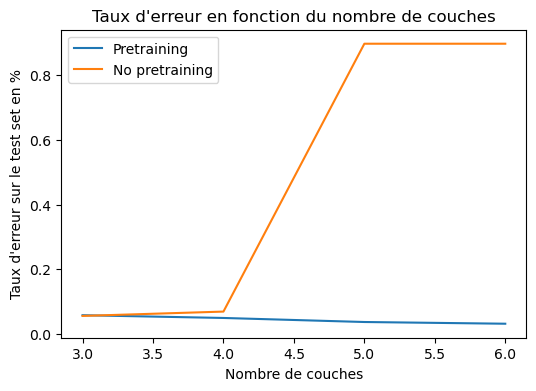

In [ ]:
test_layer_sizes = [[784, 200, 10], [784, 200, 200, 10], [784, 200, 200, 200, 10], [784, 200, 200, 200, 200, 10]]
error_rate_no_pretraining = []
error_rate_pretraining = []
for layer in test_layer_sizes:
    print(f"Test du modèle avec les couches {layer}")
    print("-- Pretraining model --")
    DNN_pretraining = DNN(layer)
    DNN_pretraining.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)
    DNN_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_pretraining.append(DNN_pretraining.test_DNN(X_test, y_test))

    print("-- No pretraining model --")
    DNN_NO_pretraining = DNN(layer)
    DNN_NO_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_no_pretraining.append(DNN_NO_pretraining.test_DNN(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot([len(layer) for layer in test_layer_sizes], error_rate_pretraining, label="Pretraining")
plt.plot([len(layer) for layer in test_layer_sizes], error_rate_no_pretraining, label="No pretraining")
plt.xlabel("Nombre de couches")
plt.ylabel("Taux d'erreur sur le test set")     # proportion et non un pourcentage
plt.title("Taux d'erreur en fonction du nombre de couches")
plt.legend()
plt.show()

Donc on peut voir que pour pretrained et pour no pretrained, 4 couches est suffisant pour atteindre un taux d'erreur convenant ([784, 200, 200, 10])

#### Nombre de Neurones par layers : layer_sizes

In [13]:
mini_batch_size = 500
lr = 0.1
nb_epochs = 100

Test du modèle avec les couches [784, 100, 100, 10]
-- Pretraining model --
Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.05841331901607585
Epoch 26/100, erreur de reconstruction: 0.026982961031895347
Epoch 51/100, erreur de reconstruction: 0.02400969276279596
Epoch 76/100, erreur de reconstruction: 0.022613627898564692
Epoch 100/100, erreur de reconstruction: 0.021869552972023597
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.15708749972039152
Epoch 26/100, erreur de reconstruction: 0.038117678188956776
Epoch 51/100, erreur de reconstruction: 0.029964746441478476
Epoch 76/100, erreur de reconstruction: 0.027071840536217574
Epoch 100/100, erreur de reconstruction: 0.025772719455595124
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.12378193779127368
Epoch 26/100, erreur de reconstruction: 0.07273316060173833
Epoch 51/100, erreur de reconstruction: 0.06878315159769316
Epoch 76/100, erreur de reconstruction: 

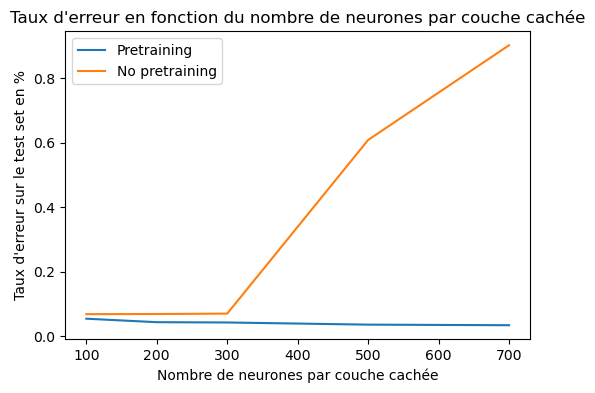

In [14]:
test_number_neurons = [[784, 100, 100, 10], [784, 200, 200, 10], [784, 300, 300, 10], [784, 500, 500, 10], [784, 700, 700, 10]]
error_rate_no_pretraining = []
error_rate_pretraining = []
for layer in test_number_neurons:
    print(f"Test du modèle avec les couches {layer}")
    print("-- Pretraining model --")
    DNN_pretraining = DNN(layer)
    DNN_pretraining.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train, verbose = True, step=25)
    DNN_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_pretraining.append(DNN_pretraining.test_DNN(X_test, y_test))

    print("-- No pretraining model --")
    DNN_NO_pretraining = DNN(layer)
    DNN_NO_pretraining.retropropagation(X_train, y_train, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_no_pretraining.append(DNN_NO_pretraining.test_DNN(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot([100, 200, 300, 500, 700], error_rate_pretraining, label="Pretraining")
plt.plot([100, 200, 300, 500, 700], error_rate_no_pretraining, label="No pretraining")
plt.xlabel("Nombre de neurones par couche cachée")
plt.ylabel("Taux d'erreur sur le test set")     # proportion et non un pourcentage
plt.title("Taux d'erreur en fonction du nombre de neurones par couche cachée")
plt.legend()
plt.show()

##### Viusualisation seulement de la courbe Pretraining, car le no-pretraining perturbe l'analyse de celle ci

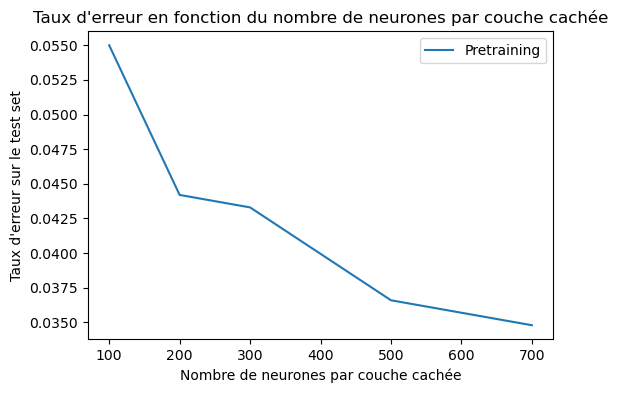

In [21]:
plt.figure(figsize=(6, 4))
plt.plot([100, 200, 300, 500, 700], error_rate_pretraining, label="Pretraining")
# plt.plot([100, 200, 300, 500, 700], error_rate_no_pretraining, label="No pretraining")
plt.xlabel("Nombre de neurones par couche cachée")
plt.ylabel("Taux d'erreur sur le test set")     # proportion et non un pourcentage
plt.title("Taux d'erreur en fonction du nombre de neurones par couche cachée")
plt.legend()
plt.show()

In [15]:
## Essayer de mélanger les données avant de les donner au modèle
# from sklearn.utils import shuffle
# X_train_shuffle, y_train_shuffle = shuffle(X_train, y_train)

In [16]:
layer_sizes = [784, 200, 200, 10]
mini_batch_size = 500
lr = 0.1
nb_epochs = 100

Test du modèle avec les couches 1000
-- Pretraining model --
Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.09743329843510026
Epoch 26/100, erreur de reconstruction: 0.0634083022765794
Epoch 51/100, erreur de reconstruction: 0.05176540206449831
Epoch 76/100, erreur de reconstruction: 0.04597030471085213
Epoch 100/100, erreur de reconstruction: 0.04203841125380397
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.12898493823777288
Epoch 26/100, erreur de reconstruction: 0.06284472942363643
Epoch 51/100, erreur de reconstruction: 0.03277922657208929
Epoch 76/100, erreur de reconstruction: 0.021321810567971233
Epoch 100/100, erreur de reconstruction: 0.01510126637203539
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.1234947000652891
Epoch 26/100, erreur de reconstruction: 0.08320493189402008
Epoch 51/100, erreur de reconstruction: 0.07772653217962816
Epoch 76/100, erreur de reconstruction: 0.06766978943895736
Epo

FileNotFoundError: [Errno 2] No such file or directory: 'figures/dnn_error_rate_samples.png'

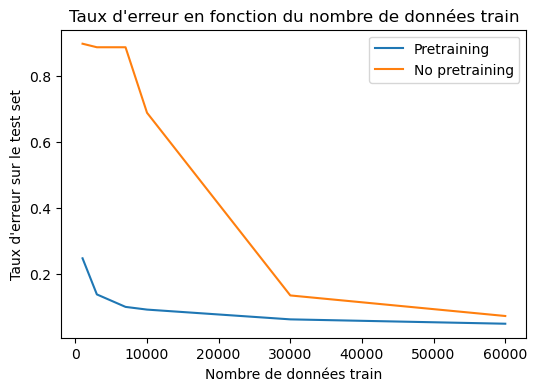

In [ ]:
test_number_samples = [1000, 3000, 7000, 10000, 30000, 60000]
error_rate_no_pretraining_samples = []
error_rate_pretraining_samples = []
X_train, X_test, y_train, y_test = lire_mnist()
for layer in test_number_samples:
    print(f"Test du modèle avec les couches {layer}")
    print("-- Pretraining model --")
    X_train_sample = X_train[:layer]
    y_train_sample = y_train[:layer]
    DNN_pretraining = DNN(layer_sizes)
    DNN_pretraining.pretrain_DNN(nb_epochs, lr, mini_batch_size, X_train_sample, verbose = True, step=25)
    DNN_pretraining.retropropagation(X_train_sample, y_train_sample, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_pretraining_samples.append(DNN_pretraining.test_DNN(X_test, y_test))

    print("-- No pretraining model --")
    DNN_NO_pretraining = DNN(layer_sizes)
    DNN_NO_pretraining.retropropagation(X_train_sample, y_train_sample, nb_epochs, lr, mini_batch_size, verbose=True, step=25)
    error_rate_no_pretraining_samples.append(DNN_NO_pretraining.test_DNN(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], error_rate_pretraining_samples, label="Pretraining")
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], error_rate_no_pretraining_samples, label="No pretraining")
plt.xlabel("Nombre de données train")
plt.ylabel("Taux d'erreur sur le test set")     # proportion et non un pourcentage
plt.title("Taux d'erreur en fonction du nombre de données train")
plt.legend()
plt.savefig("figures/dnn_error_rate_samples.png")       
plt.show()

##### Viusualisation seulement de la courbe Pretraining, car le no-pretraining perturbe l'analyse de celle ci

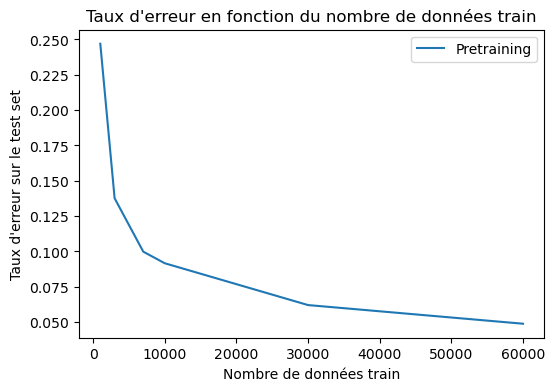

In [20]:
plt.figure(figsize=(6, 4))
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], error_rate_pretraining_samples, label="Pretraining")
# plt.plot([1000, 3000, 7000, 10000, 30000, 60000], error_rate_no_pretraining_samples, label="No pretraining")
plt.xlabel("Nombre de données train")
plt.ylabel("Taux d'erreur sur le test set")     # proportion et non un pourcentage
plt.title("Taux d'erreur en fonction du nombre de données train")
plt.legend()
plt.show()

60000 données d'entraînement, ie X_train entier (car shape = 60000) est le meilleur donc pas besoin de prendre en compte ce paramètre

### Conclusion

#### Tuning des hyperparamètres -> sélection finale

In [18]:
layer_sizes = [784, 500, 500, 10]
mini_batch_size = 32
lr = 0.1
nb_epochs_RBM = 100
nb_epochs_DNN = 200

DNN_best = DNN(layer_sizes)
DNN_best.pretrain_DNN(nb_epochs_RBM, lr, mini_batch_size, X_train, verbose = True, step=25)
DNN_best.retropropagation(X_train, y_train, nb_epochs_DNN, lr, mini_batch_size, verbose=True, step=25)
error_rate = DNN_best.test_DNN(X_test, y_test)

Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/100, erreur de reconstruction: 0.018656304407134467
Epoch 26/100, erreur de reconstruction: 0.005882419744436177
Epoch 51/100, erreur de reconstruction: 0.005205571010457315
Epoch 76/100, erreur de reconstruction: 0.0048167261666292585
Epoch 100/100, erreur de reconstruction: 0.004663458135422212
Entraînement RBM 2 / 3
Epoch 1/100, erreur de reconstruction: 0.025868305423174084
Epoch 26/100, erreur de reconstruction: 0.009151682918459494
Epoch 51/100, erreur de reconstruction: 0.008551281760921148
Epoch 76/100, erreur de reconstruction: 0.008351227077763252
Epoch 100/100, erreur de reconstruction: 0.00821189578766603
Entraînement RBM 3 / 3
Epoch 1/100, erreur de reconstruction: 0.059041238415657275
Epoch 26/100, erreur de reconstruction: 0.05505305467658847
Epoch 51/100, erreur de reconstruction: 0.05465458448676357
Epoch 76/100, erreur de reconstruction: 0.05430351941309234
Epoch 100/100, erreur de reconstruction: 0.054178348

In [19]:
error_rate_best_train = DNN_best.test_DNN(X_train, y_train)
error_rate_best_test = DNN_best.test_DNN(X_test, y_test)

print("Best model results:")
print(f" Error rate for training set: {error_rate_best_train:.2f}")
print(f" Error rate for test set: {error_rate_best_test:.2f}")

Error rate: 0.0
Error rate: 0.0229
Best model results:
 Error rate for training set: 0.00
 Error rate for test set: 0.02


#### Prediction sur 10 digits

In [22]:
X = X_test[0:10]
for _, rbm in enumerate(DNN_best.RBM_layers[:-1]):
    X = rbm.entree_sortie_RBM(X)
predictions = np.argmax(DNN_best.calcul_softmax(X, DNN_best.RBM_layers[-1]), axis=1)

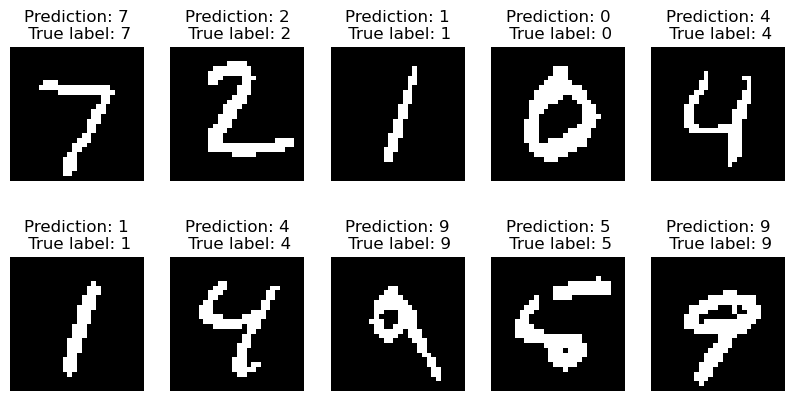

In [ ]:
plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {predictions[i]}\n True label: {np.argmax(y_test[i])}")
    plt.axis('off')